## Task Implementation Process

    1) Processing the text data
    2) Applying TF-IDF 
    3) Applying a Linear and Probabilistic model
    4) Applying Deep Learning
    5) Comparing the model performance
    6) Building an API
    7) Conclusion

### About this book

    This jupyter notebook goes through the processing of text data and finding the insights of the data.After going throught this book, you will get a better idea on how our data is, which algorithms we can implement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.externals import joblib

In [2]:
data = pd.read_csv('airline_sentiment_analysis.csv')
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


    Plotting the number of words in a review and finding the most frequetly sequence length of the review. Help us to better understand how much people wanted to talk about the airlines.

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Review length'), Text(0, 0.5, 'Frequency')]

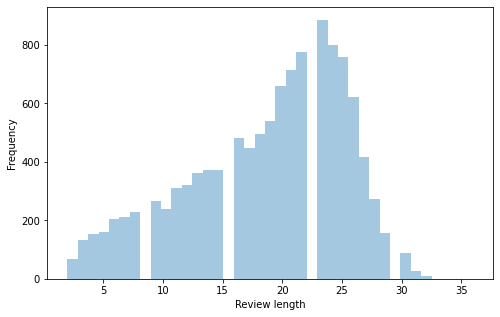

In [3]:
data['review_len'] = data['text'].apply(lambda x:len(x.split(' ')))
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(data.review_len.values,kde=False)
ax.set(xlabel='Review length', ylabel='Frequency')




Here we just replacing the positive sentiment with 0 and negative with 1. And also see the dominance of negative tweets or reviews over the positive tweets.

In [4]:
data['airline_sentiment'] = data['airline_sentiment'].replace('positive',0)
data['airline_sentiment'] = data['airline_sentiment'].replace('negative',1)
data['airline_sentiment'].value_counts()

1    9178
0    2363
Name: airline_sentiment, dtype: int64

### Spliting the data and undersampling.
To break the dominance of negative tweets we take random number of postive tweets and negative tweets for  keeping our data balanced.This process is also known as undersampling.

In [5]:
pos = data[data['airline_sentiment']==0]
neg = data[data['airline_sentiment'] == 1]

### Plot function
    Plotting the most used words for better understanding of how a customer is writing about the air lines.Here we are using WordCloud Library for viewing the frequently used words.

In [6]:
from wordcloud import WordCloud,STOPWORDS
def most_used_words(new_df):
    words = ' '.join(new_df['text'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Frequently used words in a positive text or a review

In [ ]:
most_used_words(pos)

### Frequently used words in a negative text or a review

In [ ]:
most_used_words(neg)

### Combinig the data
    Here we take the random data of positive and negative tweets to train and check how our model is performing.

In [7]:
pos_train = pos.head(2000)
neg_train = neg.head(2000)
train_data = pd.concat([pos_train,neg_train])
train_data.tail(10)

,Unnamed: 0,airline_sentiment,text,review_len
2452,3064,1,@united Flight 6212...massive fail! They delay...,17
2453,3065,1,@united I had the worst customer experience at...,21
2454,3067,1,@united can you help me with a delayed flight ...,16
2455,3068,1,"@united I'm counting on you, please don't let ...",14
2456,3069,1,@United why is it so impossible to actually ge...,18
2459,3072,1,@united #flightdelay on an early craft arrival...,16
2460,3073,1,"@united oh united, how much I despise thee!",9
2462,3076,1,@united your airline is the biggest joke of an...,13
2463,3077,1,@united what is going on with baggage claim in...,10
2464,3078,1,@united usually your lounge staff are fantasti...,21


In [8]:
pos_test = data[data['airline_sentiment']==0].tail(363)
neg_test = data[data['airline_sentiment']==1].tail(363)
test_data = pd.concat([pos_test,neg_test])

### Importing the required libraries for text preprocessing

In [9]:
import nltk
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords

### Preprocessing the text
    1) Removing the special characters.
    2) Replaing bad symbols with space.
    3) Removing the stop words.

In [10]:
import nlp_train

In [11]:
X_train = train_data['text'].values
y_train = train_data['airline_sentiment'].values

In [12]:
X_test = test_data['text'].values
y_test = test_data['airline_sentiment'].values

In [13]:
X_train = [nlp_train.text_prepare(x) for x in X_train]
X_test = [nlp_train.text_prepare(x) for x in X_test]

### Viewing the random tweet after processing

In [14]:
X_train[10]

'virginamerica know would amazingly awesome bosfll please want fly'

### Viewing the most used words in the train data after processing the text

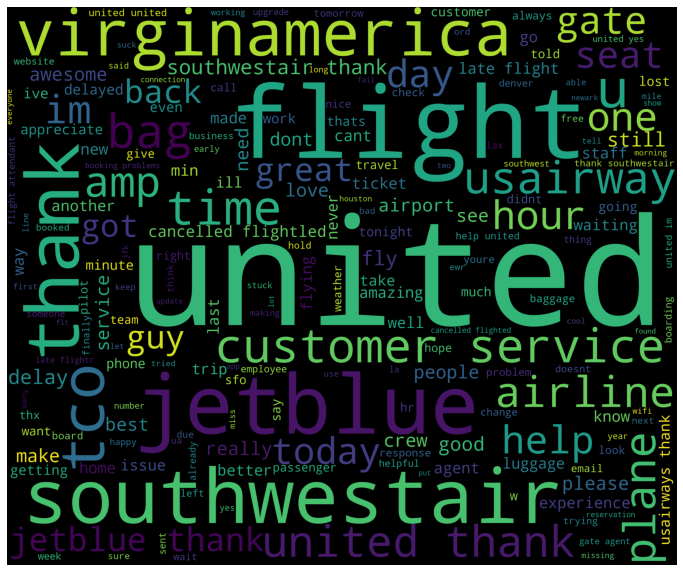

In [15]:
df_train = pd.DataFrame({'text':X_train})
most_used_words(df_train)

### Converting the text into numerical vector with TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 2))

### Saving the TF-IDF model for future use

In [18]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
joblib.dump(tfidf_vectorizer,open("Models/enthire_tfidf.pkl","wb"))
len(tfidf_vectorizer.vocabulary_)

1649

In [19]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Exporting the newly created Data.

In [20]:
train_data.to_csv('ExportedData/train.csv')
test_data.to_csv('ExportedData/test.csv')